# **I. Introduction**

**Nama : Elang Cergas Pembrani**

---

# **II. Problem Statement and Dataset Description**

## **A. Topik Permasalahan : `Analisis Streaming Service Data`**

## **B. Latar Belakang**

Saya adalah seorang Data Scientist di pada suatu tim Streaming Service (seperti Netflix dll). Selama ini, tim saya tidak menerapkan strategi yang spesifik untuk bisa menarik dan mempertahankan customer. Untuk itu, saya akan menganalisis dataset dari streaming service lain untuk melihat gambaran demografi dan perilaku customer streaming di platform lain. Dari informasi tersebut, saya bisa menarik kesimpulan dan mengatur potensi strategi yang bisa diterapkan untuk mempertahankan customer di Streaming Service saya.

## **C. Problem Statement**

Untuk mendefinisikan tujuan yang ingin dicapai, saya akan menggunakan SMART Framework seperti berikut:

|   | SMART | Framework |
| - | - | - |
| S | Specific | Menentukan strategi untuk mempertahankan customer streaming |
| M | Measurable | Menganalisis demografi, perilaku dan _engagement_ customer streaming dalam kurun waktu 1 tahun terakhir |
| A | Achieveable | Analisis demografi, perilaku dan _engagement_ customer streaming bisa dilakukan dengan menganalisis dataset tentang Streaming Service |
| R | Relevant | Analisis demografi, perilaku dan _engagement_ customer streaming bisa menjadi petunjuk untuk menentukan strategi yang dapat menjadi kunci untuk mempertahankan customer streaming |
| T | Time-bound | Analisis dilakukan dalam kurun waktu 1 minggu |

> Menganalisis demografi, perilaku dan _engagement_ customer streaming dalam kurun waktu 1 minggu dengan cara menganalisis dataset Streaming Service 1 tahun terakhir, sehingga dapat menentukan strategi yang tepat untuk mempertahankan customer streaming

## **D. Sumber Dataset**

Untuk menjawab problem statement yang sudah didefinisikan, saya menggunakan dataset terbuka dari Kaggle berjudul `Streaming Service Data` dengan URL link berikut : 

[Kaggle - Streaming Service Data](https://www.kaggle.com/datasets/akashanandt/streaming-service-data)

Dataset ini diasumsikan adalah dataset dari streaming service kompetitor yang menyediakan konten yang serupa (misal TV shows) dengan tim streaming service saya sehingga isi data customer dianggap relevan dengan tim streaming service saya.


Berikut adalah kutipan deskripsi dataset yang diambil langsung dari sumber dataset:
> The dataset consists of 5,000 customer records, capturing various aspects of their demographic, behavioral, and transactional information. It includes details such as customer age, gender, subscription length, region, and payment method. Additionally, the dataset tracks customer interactions, such as the number of support tickets raised and satisfaction scores, as well as financial data like monthly spend and discounts offered. The "Last_Activity" field indicates how recently a customer has engaged with the service. Finally, the dataset includes a churn indicator, showing whether a customer has ended their subscription. Some variables, like Age and Satisfaction_Score, contain missing values. This dataset provides valuable insights into customer behavior and can be used for analyzing churn patterns, satisfaction levels, and spending trends.

Secara sederhana, dataset dideskripsikan oleh _owner_-nya sebagai dataset yang berisi 5.000 data pelanggan, yang melingkupi berbagai aspek demografis, perilaku, dan informasi transaksi. Dataset juga melacak interaksi pelanggan, seperti jumlah tiket bantuan yang diajukan dan nilai kepuasan, serta data finansial seperti besaran langganan per bulan dan diskon yang telah ditawarkan. Terdapat kolom khusus untuk melacak kapan pelanggan terakhir kali berinteraksi dengan layanan Streaming. Yang terakhir ada indikator _churn_, yang menunjukkan apakah pelanggan sudah mengakhiri _subscription_ mereka.


## **E. Penjabaran Masalah**

Problem Statement: **Menganalisis demografi, perilaku dan _engagement_ customer streaming**

Penjabaran Masalah:
  1. [Demografi customer seperti apa jika dilihat dari kelompok usia dan jenis kelamin?](#1-demografi-customer-seperti-apa-jika-dilihat-dari-kelompok-usia-dan-jenis-kelamin)
  2. [Demografi customer seperti apa yang paling sering menonton streaming?](#2-demografi-customer-seperti-apa-yang-paling-sering-menonton-streaming)
  3. [Berapa rata-rata jangka waktu customer telah melakukan _subscribe_ berdasarkan demografi?](#3-berapa-rata-rata-jangka-waktu-customer-telah-melakukan-subscribe-berdasarkan-demografi)
  4. [Berapa rata-rata pengeluaran _subscription_ per bulan customer berdasarkan demografi?](#4-berapa-rata-rata-pengeluaran-subscription-per-bulan-customer-berdasarkan-demografi)
  5. [Bagaimana diskon yang ditawarkan mempengaruhi pengeluaran langganan per bulan?](#5-bagaimana-diskon-yang-ditawarkan-mempengaruhi-pengeluaran-langganan-per-bulan)
  6. [Apakah ada hubungan antara tiket bantuan yang diajukan dengan nilai kepuasan customer?](#6-apakah-ada-hubungan-antara-tiket-bantuan-yang-diajukan-dengan-nilai-kepuasan-customer)
  7. [Apakah tiket bantuan yang diajukan mempengaruhi berhentinya customer mengikuti streaming?](#7-apakah-tiket-bantuan-yang-diajukan-mempengaruhi-berhentinya-customer-mengikuti-streaming)
  8. [Apakah metode pembayaran mempengaruhi pengeluaran langganan per bulan?](#8-apakah-metode-pembayaran-mempengaruhi-pengeluaran-langganan-per-bulan)
  9. [Apakah penilaian kepuasan customer yang masih berlangganan sama dengan customer yang sudah tidak berlangganan?](#9-apakah-penilaian-kepuasan-customer-yang-masih-berlangganan-sama-dengan-customer-yang-sudah-tidak-berlangganan)


---

# **III. Data Loading**

## **A. Preparation**

Sebelum rangkaian proses data loading, dilakukan dulu proses import _library_ yang dibutuhkan dalam seluruh rangkaian program seperti Pandas, Scipy dan lain-lain.

In [848]:
# Import Library
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

plot_dir = './plot'

## **B. Import Dataset**

Dataset yang didapatkan dari [Kaggle](https://www.kaggle.com/datasets/akashanandt/streaming-service-data) seperti di atas sudah berbentuk [kompresi ZIP](./streaming-service-data.zip) berisi satu file CSV. Untuk melakukan loading data tersebut saya akan melakukan import file CSV menjadi _DataFrame_. File CSV bernama [streaming.csv](./streaming.csv).


In [849]:
# Import Data
csv_file = './streaming.csv'
df = pd.read_csv(csv_file)

df

,Customer_ID,Age,Gender,Subscription_Length,Region,Payment_Method,Support_Tickets_Raised,Satisfaction_Score,Discount_Offered,Last_Activity,Monthly_Spend,Churned
0,CUST000001,56.0,Male,54,South,PayPal,0,9.0,6.42,319,62.11,1
1,CUST000002,69.0,Female,21,East,Debit Card,1,2.0,13.77,166,37.27,1
2,CUST000003,46.0,Female,49,East,PayPal,3,8.0,19.91,207,61.82,0
3,CUST000004,32.0,Male,47,West,Debit Card,3,1.0,13.39,108,40.96,1
4,CUST000005,60.0,Male,6,East,Credit Card,2,NaN,13.18,65,45.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,CUST004996,24.0,Male,5,East,Debit Card,0,8.0,18.03,121,51.61,0
4996,CUST004997,66.0,Female,12,East,PayPal,3,5.0,5.84,192,36.32,0
4997,CUST004998,26.0,Female,1,East,Credit Card,2,8.0,6.76,354,42.07,1
4998,CUST004999,53.0,Female,44,South,Debit Card,1,10.0,5.95,31,60.09,0


## **C. Eksplorasi Data Sederhana**

### **1. Jumlah Baris dan Kolom Dataset**

Data mentah yang didapatkan dari dataset berjumlah `5.000` baris dan `12` kolom.

In [850]:
print('Jumlah Baris:', df.shape[0])
print('Jumlah Kolom:', df.shape[1])

Jumlah Baris: 5000
Jumlah Kolom: 12


### **2. Sampling Data**

Untuk melihat sekilas isi data, bisa dilakukan _sampling data_. Berikut adalah sampel `10` baris data pertama.

In [851]:
df.head(10)

,Customer_ID,Age,Gender,Subscription_Length,Region,Payment_Method,Support_Tickets_Raised,Satisfaction_Score,Discount_Offered,Last_Activity,Monthly_Spend,Churned
0,CUST000001,56.0,Male,54,South,PayPal,0,9.0,6.42,319,62.11,1
1,CUST000002,69.0,Female,21,East,Debit Card,1,2.0,13.77,166,37.27,1
2,CUST000003,46.0,Female,49,East,PayPal,3,8.0,19.91,207,61.82,0
3,CUST000004,32.0,Male,47,West,Debit Card,3,1.0,13.39,108,40.96,1
4,CUST000005,60.0,Male,6,East,Credit Card,2,NaN,13.18,65,45.97,0
5,CUST000006,25.0,Female,48,East,PayPal,2,NaN,5.60,267,43.48,1
6,CUST000007,38.0,Female,49,East,Debit Card,2,5.0,7.09,353,48.90,1
7,CUST000008,56.0,Female,3,East,Credit Card,0,1.0,12.70,185,29.09,1
8,CUST000009,36.0,Female,10,South,PayPal,3,1.0,19.78,224,31.56,1
9,CUST000010,NaN,Female,5,East,PayPal,2,6.0,18.15,153,43.79,0


### **3. Deskripsi Kolom**

Berdasarkan kode berikut terdapat `12` kolom pada data, yaitu:

| No. | Kolom | Jenis Data | Kosong? | Deskripsi |
| - | - | - | - | - |
| 1 | `Customer_ID` | Kategorikal | - | ID customer dengan menggunakan pengkodean dalam format tertentu. |
| 2 | `Age` | Numerik Desimal | `500` | Umur customer dalam bentuk desimal. |
| 3 | `Gender` | Kategorikal | - | Jenis kelamin customer. |
| 4 | `Subscription_Length` | Numerik Diskrit | - | Berapa lama customer telah melakukan _subscribe_ (dalam satuan bulan). |
| 5 | `Region` | Kategorikal | - | Wilayah asal customer. |
| 6 | `Payment_Method` | Kategorikal | - | Metode pembayaran customer. |
| 7 | `Support_Tickets_Raised` | Numerik Diskrit | - | Jumlah tiket bantuan yang telah diajukan oleh customer. |
| 8 | `Satisfaction_Score` | Ordinal | `500` | Nilai kepuasan customer (1 = tidak puas dan 10 = sangat puas). |
| 9 | `Discount_Offered` | Numerik Desimal | - | Diskon yang telah ditawarkan ke customer (satuan dalam dolar). |
| 10 | `Last_Activity` | Numerik Diskrit | - | Berapa lama customer tidak mengunjungi streaming service dalam hitungan hari. |
| 11 | `Monthly_Spend` | Numerik Desimal | - | Jumlah pengeluaran customer pada streaming service (satuan dalam dolar). |
| 12 | `Churned` | Kategorikal | - | Apakah customer sudah tidak mengikuti streaming. `1` untuk tidak mengikuti dan `0` bila masih mengikuti |


In [852]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer_ID             5000 non-null   object 
 1   Age                     4500 non-null   float64
 2   Gender                  5000 non-null   object 
 3   Subscription_Length     5000 non-null   int64  
 4   Region                  5000 non-null   object 
 5   Payment_Method          5000 non-null   object 
 6   Support_Tickets_Raised  5000 non-null   int64  
 7   Satisfaction_Score      4500 non-null   float64
 8   Discount_Offered        5000 non-null   float64
 9   Last_Activity           5000 non-null   int64  
 10  Monthly_Spend           5000 non-null   float64
 11  Churned                 5000 non-null   int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 468.9+ KB


### **4. Deskripsi Kolom Kategorikal**

#### **a. Kolom `Customer_ID`**

Kolom `Customer_ID` berisi data ID customer. Karena setiap baris data dalam tabel merepresentasikan satu customer yang _unique_, maka seharusnya kolom ini adalah kolom dengan nilai _unique_ yang bisa digunakan sebagai _index_ atau _key_ dalam identifikasi baris data.

Dari kode berikut, terlihat bahwa jumlah nilai _unique_ pada kolom `Customer_ID` yaitu sebanyak `5.000`. Jumlah ini sama dengan jumlah total baris pada tabel, yang artinya kolom ini bisa dijadikan sebagai _index_ tabel pada tahap _Data Cleaning_. Selain itu ini juga menunjukkan bahwa semua data customer sudah _unique_ dan tidak terjadi duplikasi data.

In [853]:
print('Nilai unique pada kolom [Customer_ID] :', df['Customer_ID'].nunique())

Nilai unique pada kolom [Customer_ID] : 5000


#### **b. Kolom `Gender`**

Kolom `Gender` berisi data jenis kelamin customer.

Dari kode berikut, terlihat bahwa ada `2` nilai _unique_ pada kolom `Gender`.

In [854]:
print('Nilai unique pada kolom [Gender] :', df['Gender'].nunique())

Nilai unique pada kolom [Gender] : 2


Karena nilai _unique_ hanya ada `2`, bisa ditampilkan daftar nilai _unique_ pada kolom `Gender`, yaitu `Male` dan `Female` seperti berikut:

In [855]:
print('Daftar nilai unique pada kolom', df['Gender'].value_counts())

Daftar nilai unique pada kolom Gender
Female    2514
Male      2486
Name: count, dtype: int64


#### **c. Kolom `Region`**

Kolom `Region` berisi data wilayah asal customer.

Dari kode berikut, terlihat bahwa ada `4` nilai _unique_ pada kolom `Region`.

In [856]:
print('Nilai unique pada kolom [Region] :', df['Region'].nunique())

Nilai unique pada kolom [Region] : 4


Karena nilai _unique_ hanya ada `4`, bisa ditampilkan daftar nilai _unique_ pada kolom `Region`, yaitu `North`, `South`, `East` dan `West` seperti berikut:

In [857]:
print('Daftar nilai unique pada kolom', df['Region'].value_counts())

Daftar nilai unique pada kolom Region
West     1316
North    1243
South    1239
East     1202
Name: count, dtype: int64


#### **d. Kolom `Payment_Method`**

Kolom `Payment_Method` berisi data jenis metode pembayaran customer.

Dari kode berikut, terlihat bahwa ada `3` nilai _unique_ pada kolom `Payment_Method`.

In [858]:
print('Nilai unique pada kolom [Payment_Method] :', df['Payment_Method'].nunique())

Nilai unique pada kolom [Payment_Method] : 3


Karena nilai _unique_ hanya ada `3`, bisa ditampilkan daftar nilai _unique_ pada kolom `Payment_Method`, yaitu `Debit Card`, `Paypal` dan `Credit Card` seperti berikut:

In [859]:
print('Daftar nilai unique pada kolom', df['Payment_Method'].value_counts())

Daftar nilai unique pada kolom Payment_Method
Debit Card     1697
PayPal         1673
Credit Card    1630
Name: count, dtype: int64


#### **e. Kolom `Churned`**

Kolom `Churned` berisi data apakah customer sudah tidak mengikuti streaming. Kolom ini berbentuk numerik bilangan bulat, namun sebenarnya isi data adalah berupa kategorikal _boolean_. Nilai kebenaran _boolean_ disimbolkan dengan angka `1` untuk benar dan `0` untuk tidak benar.

Dari kode berikut, terlihat bahwa ada `2` nilai _unique_ pada kolom `Churned`.

In [860]:
print('Nilai unique pada kolom [Churned] :', df['Churned'].nunique())

Nilai unique pada kolom [Churned] : 2


Karena nilai _unique_ hanya ada `2`, bisa ditampilkan daftar nilai _unique_ pada kolom `Churned`, yaitu `1` untuk sudah tidak mengikuti streaming dan `0` untuk masih mengikuti streaming, seperti berikut:

In [861]:
print('Daftar nilai unique pada kolom', df['Churned'].value_counts())

Daftar nilai unique pada kolom Churned
0    2760
1    2240
Name: count, dtype: int64


#### **f. Kolom `Age`**

Kolom `Age` berisi data umur customer. Meskipun data ini adalah data numerik, namun sebagai kebutuhan analisis demografi maka dibutuhkan pengelompokkan data berdasarkan umur. Pengelompokkan dilakukan dengan rentang `10` tahun, seperti `0-10`, `11-20` dan seterusnya.

Untuk bisa menentukan daftar kelompok umur maka akan dilihat batas bawah (_minimum_) dan batas atas (_maksimum_) dari kolom `Age`. Dari kode berikut terlihat bahwa batas bawah usia adalah `18` dan batas atas usia adalah `69`. Maka dari itu saya menentukan kelompok usia sebagai berikut:
  1. `15-24`
  2. `25-34`
  3. `35-44`
  4. `45-54`
  5. `55-64`
  6. `65-74`


In [862]:
print('[MAX] Batas Atas Kolom Age  :', df['Age'].max())
print('[MIN] Batas Bawah Kolom Age :', df['Age'].min())

[MAX] Batas Atas Kolom Age  : 69.0
[MIN] Batas Bawah Kolom Age : 18.0


#### **g. Kolom `Satisfaction_Score`**

Kolom `Satisfaction_Score` berisi data nilai kepuasan customer yang berupa data ordinal berbentuk numerik.

Dari kode berikut, terlihat bahwa ada `10` nilai _unique_ pada kolom `Satisfaction_Score`.

In [863]:
print('Nilai unique pada kolom [Satisfaction_Score] :', df['Satisfaction_Score'].nunique())

Nilai unique pada kolom [Satisfaction_Score] : 10


Karena nilai _unique_ hanya ada `10`, bisa ditampilkan daftar nilai _unique_ pada kolom `Satisfaction_Score` seperti berikut:

In [864]:
print('Daftar nilai unique pada kolom', df['Satisfaction_Score'].value_counts(dropna=False).sort_index())

Daftar nilai unique pada kolom Satisfaction_Score
1.0     450
2.0     439
3.0     407
4.0     469
5.0     436
6.0     477
7.0     463
8.0     449
9.0     443
10.0    467
NaN     500
Name: count, dtype: int64


## **D. Kesimpulan Data Loading untuk Data Cleaning**

Berdasarkan tahapan pada _Data Loading_, berikut kesimpulan yang dapat diambil:
  1. Kolom `Customer_ID` akan dijadikan sebagai _index_ tabel.
  2. Semua kolom kecuali kolom `Churned` sudah menggunakan tipe data yang tepat. Untuk itu **data pada kolom `Churned` akan diubah menjadi tipe data _boolean_** berupa _True_/_False_ agar data dapat direpresentasikan dengan lebih jelas.
  3. Kolom `Region` berisi data wilayah asal customer yang nilainya berupa kategori berdasarkan arah mata angin. Kategori wilayah asal customer yang didasarkan pada arah mata angin kurang akurat dan kurang spesifik, sehingga **kolom `Region` akan dihapus karena kurang relevan**.
  4. Kolom `Discount_Offered` dan `Monthly_Spend` sudah berupa bilangan desimal, tapi masih dalam satuan mata uang USD. Agar data lebih relevan, maka **data pada kolom `Discount_Offered` dan kolom `Monthly_Spend` akan dikonversi dari mata uang USD menjadi rupiah IDR. Nilai tukar USD ke  IDR akan ditetapkan menjadi `16.864` (per tanggal `22 April 2025`)**. Ada bagian kode opsional untuk mengambil nilai tukar dari API internet.
  5. Penambahan kolom baru `Age_Group` untuk mengelompokkan kolom `Age`, terbagi menjadi `6` kelompok:
     1. `15-24`
     2. `25-34`
     3. `35-44`
     4. `45-54`
     5. `55-64`
     6. `65-74`
  6. Mengubah isi kolom `Gender` ke Bahasa Indonesia:
     - `Male` => `Laki-laki`
     - `Female` => `Perempuan`
  7. Terdapat dua kolom yang memiliki data kosong, yaitu kolom `Gender` dan kolom `Satisfaction_Score`. Kedua kolom ini tidak merepresentasikan data yang secara signifikan bisa mempengaruhi integritas data, untuk itu **data kosong pada kolom `Gender` dan kolom `Satisfaction_Score` tidak diproses lebih lanjut, dan baris data juga tidak dieliminasi**.
  


---

# **IV. Data Cleaning**

## **A. Proses Data Cleaning**

### **1. Kolom `Customer_ID` Sebagai Index Tabel**

In [865]:
df_1 = df.set_index('Customer_ID')

df_1

,Age,Gender,Subscription_Length,Region,Payment_Method,Support_Tickets_Raised,Satisfaction_Score,Discount_Offered,Last_Activity,Monthly_Spend,Churned
Customer_ID,,,,,,,,,,,
CUST000001,56.0,Male,54,South,PayPal,0,9.0,6.42,319,62.11,1
CUST000002,69.0,Female,21,East,Debit Card,1,2.0,13.77,166,37.27,1
CUST000003,46.0,Female,49,East,PayPal,3,8.0,19.91,207,61.82,0
CUST000004,32.0,Male,47,West,Debit Card,3,1.0,13.39,108,40.96,1
CUST000005,60.0,Male,6,East,Credit Card,2,NaN,13.18,65,45.97,0
...,...,...,...,...,...,...,...,...,...,...,...
CUST004996,24.0,Male,5,East,Debit Card,0,8.0,18.03,121,51.61,0
CUST004997,66.0,Female,12,East,PayPal,3,5.0,5.84,192,36.32,0
CUST004998,26.0,Female,1,East,Credit Card,2,8.0,6.76,354,42.07,1


### **2. Tipe Data Kolom `Churned` Menjadi _Boolean_**

In [866]:
df_2 = df_1.copy()
df_2['Churned'] = df_2['Churned'].astype(bool)

df_2.loc[:, ['Churned']]

,Churned
Customer_ID,
CUST000001,True
CUST000002,True
CUST000003,False
CUST000004,True
CUST000005,False
...,...
CUST004996,False
CUST004997,False
CUST004998,True


### **3. Kolom `Region` Dihapus**

In [867]:
df_3 = df_2.drop('Region', axis=1)

df_3

,Age,Gender,Subscription_Length,Payment_Method,Support_Tickets_Raised,Satisfaction_Score,Discount_Offered,Last_Activity,Monthly_Spend,Churned
Customer_ID,,,,,,,,,,
CUST000001,56.0,Male,54,PayPal,0,9.0,6.42,319,62.11,True
CUST000002,69.0,Female,21,Debit Card,1,2.0,13.77,166,37.27,True
CUST000003,46.0,Female,49,PayPal,3,8.0,19.91,207,61.82,False
CUST000004,32.0,Male,47,Debit Card,3,1.0,13.39,108,40.96,True
CUST000005,60.0,Male,6,Credit Card,2,NaN,13.18,65,45.97,False
...,...,...,...,...,...,...,...,...,...,...
CUST004996,24.0,Male,5,Debit Card,0,8.0,18.03,121,51.61,False
CUST004997,66.0,Female,12,PayPal,3,5.0,5.84,192,36.32,False
CUST004998,26.0,Female,1,Credit Card,2,8.0,6.76,354,42.07,True


### **4. Konversi Mata Uang USD ke IDR pada Kolom `Discount_Offered` dan `Monthly_Spend`**

#### **a. Default nilai tukar USD ke IDR per tanggal `22 April 2025` adalah `16.864`**

In [868]:
# 2025-04-22
currency_code_from = 'usd'
currency_code_to   = 'idr'
currency_rate_date = '2025-04-22'
usd_to_idr_rate_default = 16864
usd_to_idr_rate = usd_to_idr_rate_default

print(f'Nilai tukar {currency_code_from.upper()} ke {currency_code_to.upper()} pada [{currency_rate_date}] = {usd_to_idr_rate}')

Nilai tukar USD ke IDR pada [2025-04-22] = 16864


#### **b. Kode Opsional untuk mengambil nilai tukar USD ke IDR terkini dari API Internet**

Kode berikut adalah kode untuk mengambil nilai tukar USD ke IDR terkini dari API Internet.

Sumber data nilai tukar berbentuk _json_ yang dapat diakses pada link [berikut](https://cdn.jsdelivr.net/npm/@fawazahmed0/currency-api@latest/v1/currencies/usd.json) atau pada [_fallback link_](https://latest.currency-api.pages.dev/v1/currencies/usd.json) oleh [GitHub @fawazahmed0](https://github.com/fawazahmed0/exchange-api).

In [869]:
# OPTIONAL - GET FROM API - https://cdn.jsdelivr.net/npm/@fawazahmed0/currency-api@latest/v1/currencies/usd.json
import requests
try:
    api_currency_endpoint = 'https://cdn.jsdelivr.net/npm/@fawazahmed0/currency-api@latest/v1/currencies/usd.json'
    api_currency_response = requests.get(api_currency_endpoint)
    api_currency_response.raise_for_status()

    api_currency_data     = api_currency_response.json()
    api_currency_date     = api_currency_data['date']
    api_currency_from     = api_currency_data[currency_code_from]

    currency_rate_date    = api_currency_date
    usd_to_idr_rate       = api_currency_from[currency_code_to]
except:
    try:
        api_currency_endpoint2 = 'https://latest.currency-api.pages.dev/v1/currencies/usd.json'
        api_currency_response2 = requests.get(api_currency_endpoint2)
        api_currency_response2.raise_for_status()

        api_currency_data     = api_currency_response2.json()
        api_currency_date     = api_currency_data['date']
        api_currency_from     = api_currency_data[currency_code_from]

        currency_rate_date    = api_currency_date
        usd_to_idr_rate       = api_currency_from[currency_code_to]
    except:
        usd_to_idr_rate = usd_to_idr_rate_default

print(f'Nilai tukar {currency_code_from.upper()} ke {currency_code_to.upper()} pada [{currency_rate_date}] = {usd_to_idr_rate}')

Nilai tukar USD ke IDR pada [2025-04-23] = 16848.21253071


#### **c. Konversi Data Mata Uang**

In [870]:
df_4 = df_3.copy()
df_4['Discount_Offered'] = round(df_4['Discount_Offered'] * usd_to_idr_rate, 2)
df_4['Monthly_Spend']    = round(df_4['Monthly_Spend'] * usd_to_idr_rate, 2)

df_4

,Age,Gender,Subscription_Length,Payment_Method,Support_Tickets_Raised,Satisfaction_Score,Discount_Offered,Last_Activity,Monthly_Spend,Churned
Customer_ID,,,,,,,,,,
CUST000001,56.0,Male,54,PayPal,0,9.0,108165.52,319,1046442.48,True
CUST000002,69.0,Female,21,Debit Card,1,2.0,231999.89,166,627932.88,True
CUST000003,46.0,Female,49,PayPal,3,8.0,335447.91,207,1041556.50,False
CUST000004,32.0,Male,47,Debit Card,3,1.0,225597.57,108,690102.79,True
CUST000005,60.0,Male,6,Credit Card,2,NaN,222059.44,65,774512.33,False
...,...,...,...,...,...,...,...,...,...,...
CUST004996,24.0,Male,5,Debit Card,0,8.0,303773.27,121,869536.25,False
CUST004997,66.0,Female,12,PayPal,3,5.0,98393.56,192,611927.08,False
CUST004998,26.0,Female,1,Credit Card,2,8.0,113893.92,354,708804.30,True


### **5. Penambahan Kolom `Age_Group`**

In [871]:
def classify_age(age: float):
    if 0 <= age < 15:
        return  '0-14'
    elif 15 <= age < 25:
        return '15-24'
    elif 25 <= age < 35:
        return '25-34'
    elif 35 <= age < 45:
        return '35-44'
    elif 45 <= age < 55:
        return '45-54'
    elif 55 <= age < 65:
        return '55-64'
    elif 65 <= age < 75:
        return '65-74'
    else:
        return pd.NA

df_5 = df_4.copy()
df_5.insert(1, 'Age_Group', df_5['Age'].apply(classify_age))

df_5

,Age,Age_Group,Gender,Subscription_Length,Payment_Method,Support_Tickets_Raised,Satisfaction_Score,Discount_Offered,Last_Activity,Monthly_Spend,Churned
Customer_ID,,,,,,,,,,,
CUST000001,56.0,55-64,Male,54,PayPal,0,9.0,108165.52,319,1046442.48,True
CUST000002,69.0,65-74,Female,21,Debit Card,1,2.0,231999.89,166,627932.88,True
CUST000003,46.0,45-54,Female,49,PayPal,3,8.0,335447.91,207,1041556.50,False
CUST000004,32.0,25-34,Male,47,Debit Card,3,1.0,225597.57,108,690102.79,True
CUST000005,60.0,55-64,Male,6,Credit Card,2,NaN,222059.44,65,774512.33,False
...,...,...,...,...,...,...,...,...,...,...,...
CUST004996,24.0,15-24,Male,5,Debit Card,0,8.0,303773.27,121,869536.25,False
CUST004997,66.0,65-74,Female,12,PayPal,3,5.0,98393.56,192,611927.08,False
CUST004998,26.0,25-34,Female,1,Credit Card,2,8.0,113893.92,354,708804.30,True


### **6. Mengubah Isi Kolom `Gender` ke Bahasa Indonesia**

In [872]:
def classify_gender(gender: str):
    if str(gender).upper() == 'MALE':
        return 'Laki-laki'
    elif str(gender).upper() == 'FEMALE':
        return 'Perempuan'
    else:
        return pd.NA

df_6 = df_5.copy()
df_6['Gender'] = df_6['Gender'].apply(classify_gender)

df_6

,Age,Age_Group,Gender,Subscription_Length,Payment_Method,Support_Tickets_Raised,Satisfaction_Score,Discount_Offered,Last_Activity,Monthly_Spend,Churned
Customer_ID,,,,,,,,,,,
CUST000001,56.0,55-64,Laki-laki,54,PayPal,0,9.0,108165.52,319,1046442.48,True
CUST000002,69.0,65-74,Perempuan,21,Debit Card,1,2.0,231999.89,166,627932.88,True
CUST000003,46.0,45-54,Perempuan,49,PayPal,3,8.0,335447.91,207,1041556.50,False
CUST000004,32.0,25-34,Laki-laki,47,Debit Card,3,1.0,225597.57,108,690102.79,True
CUST000005,60.0,55-64,Laki-laki,6,Credit Card,2,NaN,222059.44,65,774512.33,False
...,...,...,...,...,...,...,...,...,...,...,...
CUST004996,24.0,15-24,Laki-laki,5,Debit Card,0,8.0,303773.27,121,869536.25,False
CUST004997,66.0,65-74,Perempuan,12,PayPal,3,5.0,98393.56,192,611927.08,False
CUST004998,26.0,25-34,Perempuan,1,Credit Card,2,8.0,113893.92,354,708804.30,True


## **B. Hasil Akhir Data Cleaning**

### **1. Hasil DataFrame**

Hasil akhir dari proses _data cleaning_ adalah sebuah _DataFrame_ dengan nama variabel `df_clean`.

In [873]:
df_clean = df_6

df_clean

,Age,Age_Group,Gender,Subscription_Length,Payment_Method,Support_Tickets_Raised,Satisfaction_Score,Discount_Offered,Last_Activity,Monthly_Spend,Churned
Customer_ID,,,,,,,,,,,
CUST000001,56.0,55-64,Laki-laki,54,PayPal,0,9.0,108165.52,319,1046442.48,True
CUST000002,69.0,65-74,Perempuan,21,Debit Card,1,2.0,231999.89,166,627932.88,True
CUST000003,46.0,45-54,Perempuan,49,PayPal,3,8.0,335447.91,207,1041556.50,False
CUST000004,32.0,25-34,Laki-laki,47,Debit Card,3,1.0,225597.57,108,690102.79,True
CUST000005,60.0,55-64,Laki-laki,6,Credit Card,2,NaN,222059.44,65,774512.33,False
...,...,...,...,...,...,...,...,...,...,...,...
CUST004996,24.0,15-24,Laki-laki,5,Debit Card,0,8.0,303773.27,121,869536.25,False
CUST004997,66.0,65-74,Perempuan,12,PayPal,3,5.0,98393.56,192,611927.08,False
CUST004998,26.0,25-34,Perempuan,1,Credit Card,2,8.0,113893.92,354,708804.30,True


Jumlah baris `5.000` dan jumlah kolom `11` plus kolom _index_ `Customer_ID`

In [874]:
print('Jumlah Baris:', df_clean.shape[0])
print('Jumlah Kolom:', df_clean.shape[1])

Jumlah Baris: 5000
Jumlah Kolom: 11


### **2. Export Data ke File CSV**

Data yang telah dibersihkan akan di-export ke dalam bentuk CSV supaya bisa diproses dalam bentuk Dashboard Tableau.

File hasil _data cleaning_ adalah [streaming_clean.csv](./streaming_clean.csv)

In [875]:
export_csv_filename = 'streaming_clean.csv'
df_clean.to_csv(f'./{export_csv_filename}')

---

# **V. Exploration and Analysis**

Analisis distribusi pada data streaming service dibagi menjadi dua, yaitu:
  1. Analisis pada kolom numerik yang menggunakan _central tendency_ dan _normal test_
  2. Analisis pada kolom kategorikal yang menggunakan agregasi _count_

## **A. Analisis Distribusi Kolom Numerik**

### **1. Kolom Numerik `Last_Activity`**

#### **a. Central Tendency pada Kolom `Last_Activity`**

In [916]:
print(f'[Last_Activity] Minimum   : {df_clean['Last_Activity'].min():.2f}')
print(f'[Last_Activity] Maksimum  : {df_clean['Last_Activity'].max():.2f}')
print(f'[Last_Activity] Rata-rata : {df_clean['Last_Activity'].mean():.2f}')
print(f'[Last_Activity] Median    : {df_clean['Last_Activity'].median():.2f}')
# df_clean['Last_Activity'].value_counts().sort_index().plot(kind='bar')

[Last_Activity] Minimum   : 1.00
[Last_Activity] Maksimum  : 364.00
[Last_Activity] Rata-rata : 181.44
[Last_Activity] Median    : 182.00


#### **b. Normal Test pada Kolom `Last_Activity`**

Dari _skewness_ dengan nilai negatif `-0.0008428635` namun sangat mendekati nol (`-0.5 < skewness < 0.5`), maka:

> **Kolom `Last_Activity` memiliki distribusi normal yang simetris**.

In [917]:
print(f'[Last_Activity] normaltest p-value : {stats.normaltest(df_clean['Last_Activity']).pvalue:.10f}')
print(f'[Last_Activity] shapiro p-value    : {stats.shapiro(df_clean['Last_Activity']).pvalue:.10f}')
print(f'[Last_Activity] skewness           : {stats.skew(df_clean['Last_Activity']):.10f}')
print(f'[Last_Activity] kurtosis           : {stats.kurtosis(df_clean['Last_Activity']):.10f}')
print(f'[Last_Activity] average            : {df_clean['Last_Activity'].mean():.10f}')
print(f'[Last_Activity] median             : {df_clean['Last_Activity'].median():.10f}')
# df_clean['Last_Activity'].value_counts().sort_index()#.plot(kind='bar')

[Last_Activity] normaltest p-value : 0.0000000000
[Last_Activity] shapiro p-value    : 0.0000000000
[Last_Activity] skewness           : -0.0008428635
[Last_Activity] kurtosis           : -1.1981283180
[Last_Activity] average            : 181.4414000000
[Last_Activity] median             : 182.0000000000


### **2. Kolom Numerik Monthly_Spend**

#### **a. Central Tendency pada Kolom `Monthly_Spend`**

In [918]:
print(f'[Monthly_Spend] Minimum   : {df_clean['Monthly_Spend'].min():.2f}')
print(f'[Monthly_Spend] Maksimum  : {df_clean['Monthly_Spend'].max():.2f}')
print(f'[Monthly_Spend] Rata-rata : {df_clean['Monthly_Spend'].mean():.2f}')
print(f'[Monthly_Spend] Median    : {df_clean['Monthly_Spend'].median():.2f}')
# df_clean['Monthly_Spend'].value_counts().sort_index().plot(kind='hist')

[Monthly_Spend] Minimum   : -85251.96
[Monthly_Spend] Maksimum  : 2313428.06
[Monthly_Spend] Rata-rata : 785460.03
[Monthly_Spend] Median    : 785547.91


#### **b. Normal Test pada Kolom `Monthly_Spend`**

Dari _skewness_ dengan nilai positif `0.2028798683` namun masih mendekati nol (`-0.5 < skewness < 0.5`), maka:

> **Kolom `Monthly_Spend` memiliki distribusi normal yang simetris**.

In [919]:
print(f'[Monthly_Spend] normaltest p-value : {stats.normaltest(df_clean['Monthly_Spend']).pvalue:.10f}')
print(f'[Monthly_Spend] shapiro p-value    : {stats.shapiro(df_clean['Monthly_Spend']).pvalue:.10f}')
print(f'[Monthly_Spend] skewness           : {stats.skew(df_clean['Monthly_Spend']):.10f}')
print(f'[Monthly_Spend] kurtosis           : {stats.kurtosis(df_clean['Monthly_Spend']):.10f}')
print(f'[Monthly_Spend] median             : {df_clean['Monthly_Spend'].median():.10f}')
print(f'[Monthly_Spend] average            : {df_clean['Monthly_Spend'].mean():.10f}')
# df_clean['Monthly_Spend'].value_counts().sort_index()#.plot(kind='bar')

[Monthly_Spend] normaltest p-value : 0.0000000000
[Monthly_Spend] shapiro p-value    : 0.0000000000
[Monthly_Spend] skewness           : 0.2028798659
[Monthly_Spend] kurtosis           : 1.9039983023
[Monthly_Spend] median             : 785547.9100000000
[Monthly_Spend] average            : 785460.0289240000


### **3. Kolom Numerik `Discount_Offered`**

#### **a. Central Tendency pada Kolom `Discount_Offered`**

In [920]:
print(f'[Discount_Offered] Minimum   : {df_clean['Discount_Offered'].min():.2f}')
print(f'[Discount_Offered] Maksimum  : {df_clean['Discount_Offered'].max():.2f}')
print(f'[Discount_Offered] Rata-rata : {df_clean['Discount_Offered'].mean():.2f}')
print(f'[Discount_Offered] Median    : {df_clean['Discount_Offered'].median():.2f}')

[Discount_Offered] Minimum   : 84241.06
[Discount_Offered] Maksimum  : 336964.25
[Discount_Offered] Rata-rata : 209901.84
[Discount_Offered] Median    : 210602.66


#### **b. Normal Test pada Kolom `Discount_Offered`**

Dari _skewness_ dengan nilai negatif `0.0084179746` namun sangat mendekati nol (`-0.5 < skewness < 0.5`), maka:

> **Kolom `Discount_Offered` memiliki distribusi normal yang simetris**.

In [921]:
print(f'[Discount_Offered] normaltest p-value : {stats.normaltest(df_clean['Discount_Offered']).pvalue:.10f}')
print(f'[Discount_Offered] shapiro p-value    : {stats.shapiro(df_clean['Discount_Offered']).pvalue:.10f}')
print(f'[Discount_Offered] skewness           : {stats.skew(df_clean['Discount_Offered']):.10f}')
print(f'[Discount_Offered] kurtosis           : {stats.kurtosis(df_clean['Discount_Offered']):.10f}')
print(f'[Discount_Offered] median             : {df_clean['Discount_Offered'].median():.10f}')
print(f'[Discount_Offered] average            : {df_clean['Discount_Offered'].mean():.10f}')

[Discount_Offered] normaltest p-value : 0.0000000000
[Discount_Offered] shapiro p-value    : 0.0000000000
[Discount_Offered] skewness           : 0.0084179741
[Discount_Offered] kurtosis           : -1.2028454082
[Discount_Offered] median             : 210602.6600000000
[Discount_Offered] average            : 209901.8383720000


### **4. Kolom Numerik `Support_Tickets_Raised`**

#### **a. Central Tendency pada Kolom `Support_Tickets_Raised`**

In [922]:
print(f'[Support_Tickets_Raised] Minimum   : {df_clean['Support_Tickets_Raised'].min():.2f}')
print(f'[Support_Tickets_Raised] Maksimum  : {df_clean['Support_Tickets_Raised'].max():.2f}')
print(f'[Support_Tickets_Raised] Rata-rata : {df_clean['Support_Tickets_Raised'].mean():.2f}')
print(f'[Support_Tickets_Raised] Median    : {df_clean['Support_Tickets_Raised'].median():.2f}')

[Support_Tickets_Raised] Minimum   : 0.00
[Support_Tickets_Raised] Maksimum  : 9.00
[Support_Tickets_Raised] Rata-rata : 2.04
[Support_Tickets_Raised] Median    : 2.00


#### **b. Normal Test pada Kolom `Support_Tickets_Raised`**

Dari _skewness_ dengan nilai positif `0.7435583513` dan di atas `0.5` (`skewness > 0.5`), maka:

> **Kolom `Support_Tickets_Raised` memiliki distribusi normal dengan kemiringan positif sedang, ke arah nilai minimum (kiri)**.

In [923]:
print(f'[Support_Tickets_Raised] normaltest p-value : {stats.normaltest(df_clean['Support_Tickets_Raised']).pvalue}')
print(f'[Support_Tickets_Raised] shapiro p-value    : {stats.shapiro(df_clean['Support_Tickets_Raised']).pvalue}')
print(f'[Support_Tickets_Raised] skewness           : {stats.skew(df_clean['Support_Tickets_Raised']):.10f}')
print(f'[Support_Tickets_Raised] kurtosis           : {stats.kurtosis(df_clean['Support_Tickets_Raised']):.10f}')
print(f'[Support_Tickets_Raised] median             : {df_clean['Support_Tickets_Raised'].median():.10f}')
print(f'[Support_Tickets_Raised] average            : {df_clean['Support_Tickets_Raised'].mean():.10f}')

[Support_Tickets_Raised] normaltest p-value : 2.0130694929582423e-91
[Support_Tickets_Raised] shapiro p-value    : 1.2213572958745686e-45
[Support_Tickets_Raised] skewness           : 0.7435583513
[Support_Tickets_Raised] kurtosis           : 0.5951943050
[Support_Tickets_Raised] median             : 2.0000000000
[Support_Tickets_Raised] average            : 2.0370000000


### **5. Kolom Numerik `Subscription_Length`**

#### **a. Central Tendency pada Kolom `Subscription_Length`**

In [924]:
print(f'[Subscription_Length] Minimum   : {df_clean['Subscription_Length'].min():.2f}')
print(f'[Subscription_Length] Maksimum  : {df_clean['Subscription_Length'].max():.2f}')
print(f'[Subscription_Length] Rata-rata : {df_clean['Subscription_Length'].mean():.2f}')
print(f'[Subscription_Length] Median    : {df_clean['Subscription_Length'].median():.2f}')

[Subscription_Length] Minimum   : 1.00
[Subscription_Length] Maksimum  : 59.00
[Subscription_Length] Rata-rata : 29.70
[Subscription_Length] Median    : 29.00


#### **b. Normal Test pada Kolom `Subscription_Length`**

Dari _skewness_ dengan nilai positif `0.0404987922` namun sangat mendekati nol (`-0.5 < skewness < 0.5`), maka:

> **Kolom `Subscription_Length` memiliki distribusi normal yang simetris**.

In [925]:
print(f'[Subscription_Length] normaltest p-value : {stats.normaltest(df_clean['Subscription_Length']).pvalue}')
print(f'[Subscription_Length] shapiro p-value    : {stats.shapiro(df_clean['Subscription_Length']).pvalue}')
print(f'[Subscription_Length] skewness           : {stats.skew(df_clean['Subscription_Length']):.10f}')
print(f'[Subscription_Length] kurtosis           : {stats.kurtosis(df_clean['Subscription_Length']):.10f}')
print(f'[Subscription_Length] median             : {df_clean['Subscription_Length'].median():.10f}')
print(f'[Subscription_Length] average            : {df_clean['Subscription_Length'].mean():.10f}')

[Subscription_Length] normaltest p-value : 0.0
[Subscription_Length] shapiro p-value    : 5.773629306695894e-37
[Subscription_Length] skewness           : 0.0404987922
[Subscription_Length] kurtosis           : -1.1950202238
[Subscription_Length] median             : 29.0000000000
[Subscription_Length] average            : 29.7044000000


### **6. Kolom Numerik `Age`**

#### **a. Central Tendency pada Kolom `Age`**

In [926]:
print(f'[Age] Minimum   : {df_clean['Age'].min():.2f}')
print(f'[Age] Maksimum  : {df_clean['Age'].max():.2f}')
print(f'[Age] Rata-rata : {df_clean['Age'].mean():.2f}')
print(f'[Age] Median    : {df_clean['Age'].median():.2f}')

[Age] Minimum   : 18.00
[Age] Maksimum  : 69.00
[Age] Rata-rata : 43.58
[Age] Median    : 43.00


#### **b. Normal Test pada Kolom `Age`**

Dari _skewness_ dengan nilai negatif `-0.0066774549` namun sangat mendekati nol (`-0.5 < skewness < 0.5`), maka:

> **Kolom `Age` memiliki distribusi normal yang simetris**.

In [927]:
print(f'[Age] normaltest p-value : {stats.normaltest(df_clean['Age'].dropna()).pvalue}')
print(f'[Age] shapiro p-value    : {stats.shapiro(df_clean['Age'].dropna()).pvalue}')
print(f'[Age] skewness           : {stats.skew(df_clean['Age'].dropna()):.10f}')
print(f'[Age] kurtosis           : {stats.kurtosis(df_clean['Age'].dropna()):.10f}')
print(f'[Age] median             : {df_clean['Age'].median():.10f}')
print(f'[Age] average            : {df_clean['Age'].mean():.10f}')

[Age] normaltest p-value : 0.0
[Age] shapiro p-value    : 3.924054133603813e-35
[Age] skewness           : -0.0066774549
[Age] kurtosis           : -1.1835724746
[Age] median             : 43.0000000000
[Age] average            : 43.5822222222


## **B. Analisis Distribusi Kolom Kategorikal**

### **1. Kolom Kategorikal `Age_Group`**

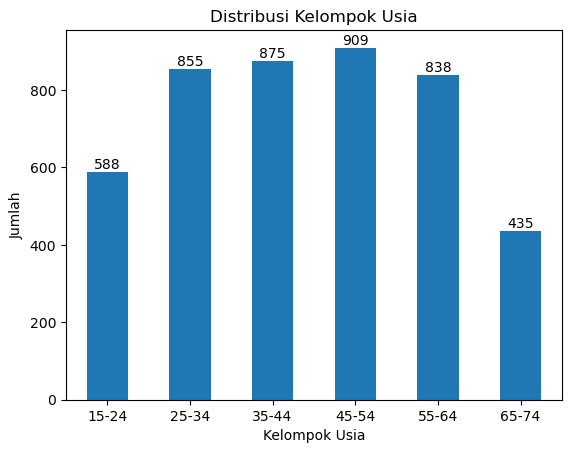

In [928]:
analysis_age_group_plot = df_clean['Age_Group'].value_counts().sort_index().plot.bar(
    rot=0,
    title='Distribusi Kelompok Usia'
)
analysis_age_group_plot.set_xlabel('Kelompok Usia')
analysis_age_group_plot.set_ylabel('Jumlah')
analysis_age_group_plot.bar_label(analysis_age_group_plot.containers[0])
plt.savefig(f'{plot_dir}/plot_1_age_group.jpg', bbox_inches='tight')
plt.show()

### **2. Kolom Kategorikal `Gender`**

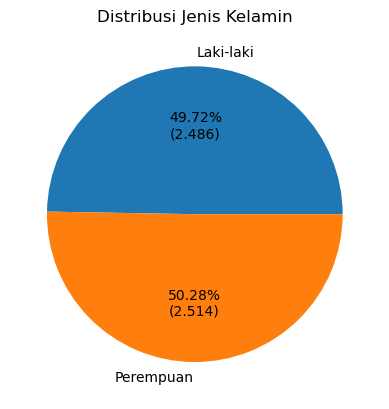

In [929]:
analysis_gender_plot = df_clean['Gender'].value_counts().sort_index().plot.pie(
    title='Distribusi Jenis Kelamin',
    label='',
    autopct=lambda pct: f'{pct:.2f}%\n' + f'({round(len(df_clean)*pct/100,0):,.0f})'.replace(',', '.')
)
plt.savefig(f'{plot_dir}/plot_2_gender.jpg', bbox_inches='tight')
plt.show()

### **3. Kolom Kategorikal `Payment_Method`**

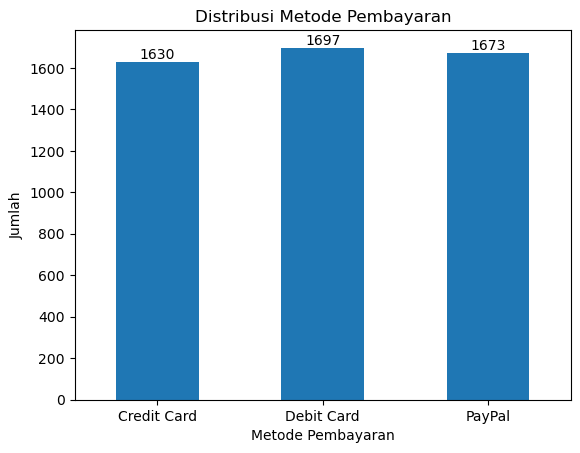

In [930]:
analysis_payment_method_plot = df_clean['Payment_Method'].value_counts().sort_index().plot.bar(
    rot=0,
    title='Distribusi Metode Pembayaran'
)
analysis_payment_method_plot.set_xlabel('Metode Pembayaran')
analysis_payment_method_plot.set_ylabel('Jumlah')
analysis_payment_method_plot.bar_label(analysis_payment_method_plot.containers[0])
plt.savefig(f'{plot_dir}/plot_3_payment_method.jpg', bbox_inches='tight')
plt.show()

### **4. Kolom Kategorikal `Churned`**

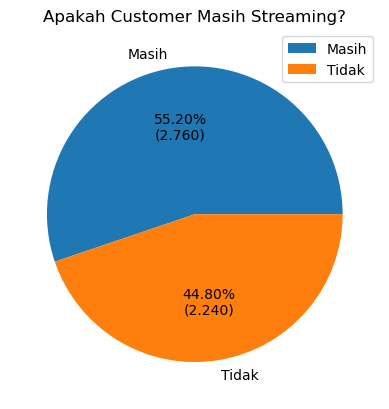

In [931]:
df_churned     = df_clean[df_clean['Churned'] == True]
df_not_churned = df_clean[df_clean['Churned'] == False]

# print('Banyak customer yang tidak mengikuti streaming :', len(df_churned))
# print('Banyak customer yang masih mengikuti streaming :', len(df_not_churned))
df_churneds_plot = pd.DataFrame({'value': [len(df_not_churned.index), len(df_churned.index)]}, index=['Masih', 'Tidak']).plot.pie(
    y='value', 
    label='',
    title='Apakah Customer Masih Streaming?',
    autopct=lambda pct: f'{pct:.2f}%\n' + f'({round(len(df_clean)*pct/100,0):,.0f})'.replace(',', '.')
)
plt.savefig(f'{plot_dir}/plot_4_churned.jpg', bbox_inches='tight')
plt.show()

### **5. Kolom Ordinal `Satisfaction_Score`**

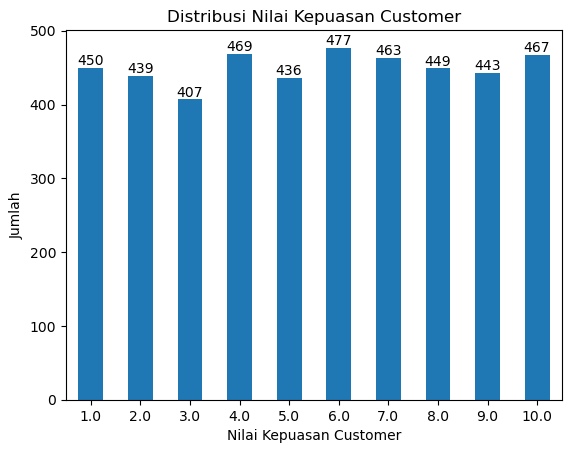

In [932]:
analysis_satisfaction_score_plot = df_clean['Satisfaction_Score'].value_counts().sort_index().plot.bar(
    rot=0,
    title='Distribusi Nilai Kepuasan Customer'
)
analysis_satisfaction_score_plot.set_xlabel('Nilai Kepuasan Customer')
analysis_satisfaction_score_plot.set_ylabel('Jumlah')
analysis_satisfaction_score_plot.bar_label(analysis_satisfaction_score_plot.containers[0])
plt.savefig(f'{plot_dir}/plot_5_satisfaction_score.jpg', bbox_inches='tight')
plt.show()

## **C. Analisis Penjabaran Masalah**

Pada tahap ini, data sudah siap untuk dianalisis lebih lanjut. Pada bagian [Penjabaran Masalah](#e-penjabaran-masalah), sudah didefinisikan pertanyaan-pertanyaan yang akan dijawab dengan cara melakukan analisis data. Setiap pertanyaan akan terbagi menjadi section masing-masing.

### **1. Demografi customer seperti apa jika dilihat dari kelompok usia dan jenis kelamin?**

Untuk pertanyaan ini, demografi yang digunakan adalah pengelompokan kombinasi antara kelompok usia `Age_Group` dengan jenis kelamin `Gender`.

In [933]:
problem_1_groupby = df_clean.dropna(subset='Age_Group').reset_index().loc[:, ['Age_Group', 'Gender', 'Customer_ID']].groupby(by=['Age_Group', 'Gender'])

problem_1_count = problem_1_groupby.count()

problem_1_count

Customer_ID
Age_Group Gender                
15-24     Laki-laki          294
          Perempuan          294
25-34     Laki-laki          420
          Perempuan          435
35-44     Laki-laki          449
          Perempuan          426
45-54     Laki-laki          473
          Perempuan          436
55-64     Laki-laki          402
          Perempuan          436
65-74     Laki-laki          205
          Perempuan          230

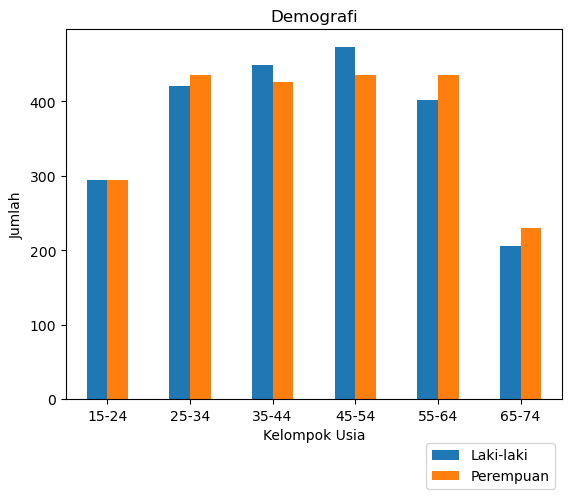

In [934]:
problem_1_plot = problem_1_count.apply(lambda c: c.apply(lambda x: round(x, 2))).unstack('Gender').sort_index().plot.bar(
    rot=0,
    title='Demografi',
)
problem_1_plot.legend(problem_1_count.unstack('Age_Group').index.to_list(), loc='upper right', bbox_to_anchor=(1, -0.1))
problem_1_plot.set_xlabel('Kelompok Usia')
problem_1_plot.set_ylabel('Jumlah')
plt.savefig(f'{plot_dir}/plot_6_problem_1.jpg', bbox_inches='tight')
plt.show()

### **2. Demografi customer seperti apa yang paling sering menonton streaming?**

Untuk pertanyaan ini, demografi yang digunakan adalah kombinasi antara kelompok usia `Age_Group` dengan jenis kelamin `Gender`.

Tingkat keseringan menonton streaming didapatkan dari **nilai rata-rata kolom `Last_Activity`** yang menghitung berapa hari customer terakhir kali berinteraksi dengan streaming service. Semakin sedikit angka pada kolom ini artinya customer semakin sering berinteraksi.

Selain itu, dilakukan juga filter terhadap kolom `Churned` yang mengindikasikan apakah customer masih lanjut berlangganan streaming atau tidak. Customer yang masih berlangganan memiliki status `Churned` yang `False`.

Dari hasil kode berikut, disimpulkan bahwa:

> **Demografi kombinasi kelompok usia dan jenis kelamin yang paling sering menonton streaming adalah demografi `Laki-laki` dengan rentang usia `15-24` tahun, dengan rata-rata jarak menonton `139.03` hari**.

In [935]:
# Filter Customer Masih Berlangganan
problem_2_not_churned = df_clean[df_clean['Churned'] == False]

# Group By Age_Group, Gender
problem_2_groupby = problem_2_not_churned.dropna(subset='Age_Group').loc[:, ['Age_Group', 'Gender', 'Last_Activity']].groupby(by=['Age_Group', 'Gender'])

# Nilai Rata-rata
problem_2_mean = problem_2_groupby.mean()

# Split Hasil
problem_2_result_index = problem_2_mean.index[0]
problem_2_result_num   = round(problem_2_mean.iloc[0, 0], 2)

# Print
print(f'Kelompok yang paling sering menonton streaming : [{problem_2_result_index}]')
print(f'Rata-rata jarak hari menonton streaming        : {problem_2_result_num} hari')
problem_2_mean.apply(lambda c: c.apply(lambda x: round(x, 2)))

Kelompok yang paling sering menonton streaming : [('15-24', 'Laki-laki')]
Rata-rata jarak hari menonton streaming        : 139.03 hari


Last_Activity
Age_Group Gender                  
15-24     Laki-laki         139.03
          Perempuan         155.22
25-34     Laki-laki         156.44
          Perempuan         157.55
35-44     Laki-laki         143.14
          Perempuan         147.38
45-54     Laki-laki         142.76
          Perempuan         151.22
55-64     Laki-laki         152.12
          Perempuan         148.69
65-74     Laki-laki         157.64
          Perempuan         155.25

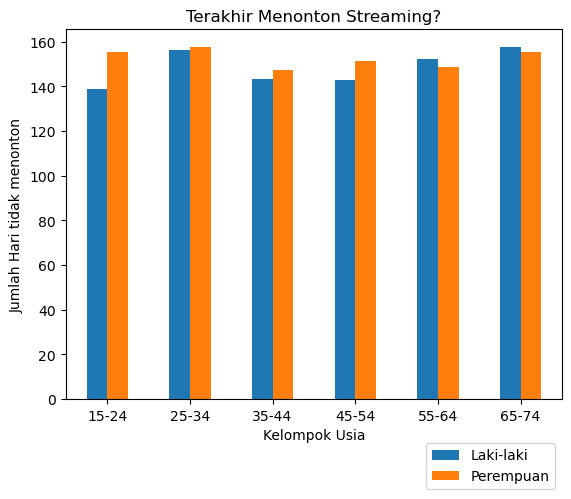

In [936]:
problem_2_plot = problem_2_mean.apply(lambda c: c.apply(lambda x: round(x, 2))).unstack('Gender').sort_index().plot.bar(
    rot=0,
    title='Terakhir Menonton Streaming?',
)
problem_2_plot.legend(problem_2_mean.unstack('Age_Group').index.to_list(), loc='upper right', bbox_to_anchor=(1, -0.1))
problem_2_plot.set_xlabel('Kelompok Usia')
problem_2_plot.set_ylabel('Jumlah Hari tidak menonton')
plt.savefig(f'{plot_dir}/plot_7_problem_2.jpg', bbox_inches='tight')
plt.show()

### **3. Berapa rata-rata jangka waktu customer telah melakukan _subscribe_ berdasarkan demografi?**

Untuk pertanyaan ini, demografi yang digunakan adalah kombinasi antara kelompok usia `Age_Group` dengan jenis kelamin `Gender`.

Jangka waktu customer telah melakukan subscribe didapatkan dari **nilai rata-rata kolom `Subscription_Length`** yang menghitung berapa bulan customer telah subscribe streaming service. Semakin banyak angka pada kolom ini artinya customer sudah subscribe sejak lama.

Selain itu, dilakukan juga filter terhadap kolom `Churned` yang mengindikasikan apakah customer masih lanjut berlangganan streaming atau tidak. Customer yang masih berlangganan memiliki status `Churned` yang `False`.

**Hasil rata-rata jangka waktu customer telah melakukan _subscribe_ berdasarkan demografi dapat dilihat pada grafik batang di bawah ini.**

In [937]:
# Filter Customer Masih Berlangganan
problem_3_not_churned = df_clean[df_clean['Churned'] == False]

# Group By Age_Group, Gender
problem_3_groupby = problem_3_not_churned.dropna(subset='Age_Group').loc[:, ['Age_Group', 'Gender', 'Subscription_Length']].groupby(by=['Age_Group', 'Gender'])

# Nilai Rata-rata
problem_3_mean = problem_3_groupby.mean()

# Split Hasil
problem_3_result_index = problem_3_mean.index[0]
problem_3_result_num   = round(problem_3_mean.iloc[0, 0], 2)

# Print
problem_3_mean.apply(lambda c: c.apply(lambda x: round(x, 1)))

Subscription_Length
Age_Group Gender                        
15-24     Laki-laki                 29.3
          Perempuan                 27.2
25-34     Laki-laki                 28.3
          Perempuan                 29.6
35-44     Laki-laki                 31.2
          Perempuan                 30.8
45-54     Laki-laki                 29.2
          Perempuan                 29.8
55-64     Laki-laki                 30.9
          Perempuan                 29.3
65-74     Laki-laki                 28.1
          Perempuan                 30.3

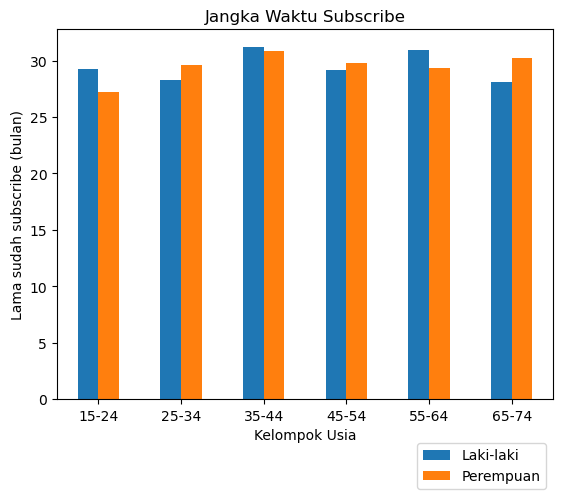

In [938]:
problem_3_plot = problem_3_mean.apply(lambda c: c.apply(lambda x: round(x, 2))).unstack('Gender').sort_index().plot.bar(
    rot=0,
    title='Jangka Waktu Subscribe',
)
problem_3_plot.legend(problem_3_mean.unstack('Age_Group').index.to_list(), loc='upper right', bbox_to_anchor=(1, -0.1))
problem_3_plot.set_xlabel('Kelompok Usia')
problem_3_plot.set_ylabel('Lama sudah subscribe (bulan)')
plt.savefig(f'{plot_dir}/plot_8_problem_3.jpg', bbox_inches='tight')
plt.show()

### **4. Berapa rata-rata pengeluaran _subscription_ per bulan customer berdasarkan demografi?**

Untuk pertanyaan ini, demografi yang digunakan adalah kombinasi antara kelompok usia `Age_Group` dengan jenis kelamin `Gender`.

Pengeluaran _subscription_ didapatkan dari **nilai rata-rata kolom `Monthly_Spend`** yang menghitung berapa pengeluaran customer per bulan pada streaming service.

**Hasil rata-rata pengeluaran _subscription_ per bulan customer berdasarkan demografi dapat dilihat pada grafik batang di bawah ini.**

In [939]:
problem_4_groupby = df_clean.dropna(subset='Age_Group').loc[:, ['Age_Group', 'Gender', 'Monthly_Spend']].groupby(by=['Age_Group', 'Gender'])

# Nilai Rata-rata
problem_4_mean = problem_4_groupby.mean()

# Split Hasil
problem_4_result_index = problem_4_mean.index[0]
problem_4_result_num   = round(problem_4_mean.iloc[0, 0], 2)

# Print
problem_4_mean.apply(lambda c: c.apply(lambda x: f'Rp {x:,.0f}'.replace(',', '.')))

Monthly_Spend
Age_Group Gender                 
15-24     Laki-laki    Rp 780.849
          Perempuan    Rp 773.822
25-34     Laki-laki    Rp 786.252
          Perempuan    Rp 787.904
35-44     Laki-laki    Rp 794.745
          Perempuan    Rp 789.486
45-54     Laki-laki    Rp 776.143
          Perempuan    Rp 782.111
55-64     Laki-laki    Rp 791.627
          Perempuan    Rp 785.495
65-74     Laki-laki    Rp 792.413
          Perempuan    Rp 774.441

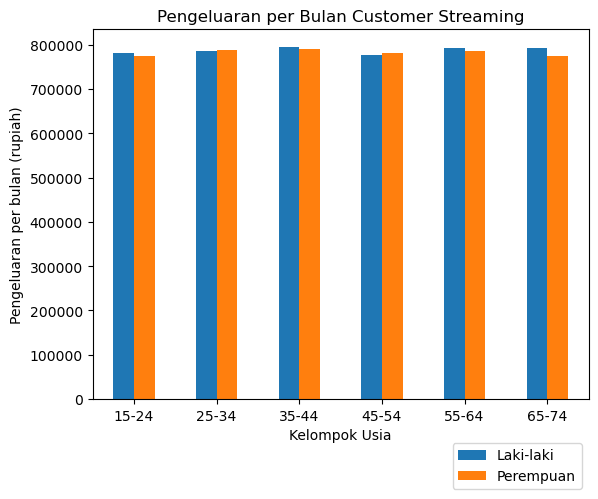

In [940]:
problem_4_plot = problem_4_mean.apply(lambda c: c.apply(lambda x: round(x, 2))).unstack('Gender').sort_index().plot.bar(
    rot=0,
    title='Pengeluaran per Bulan Customer Streaming',
)
problem_4_plot.legend(problem_4_mean.unstack('Age_Group').index.to_list(), loc='upper right', bbox_to_anchor=(1, -0.1))
problem_4_plot.set_xlabel('Kelompok Usia')
problem_4_plot.set_ylabel('Pengeluaran per bulan (rupiah)')
plt.savefig(f'{plot_dir}/plot_9_problem_4.jpg', bbox_inches='tight')
plt.show()

### **5. Bagaimana diskon yang ditawarkan mempengaruhi pengeluaran langganan per bulan?**

Pertanyaan ini dapat dijawab dengan cara melakukan analisis korelasi. Karena diskon yang ditawarkan dan pengeluaran langganan per bulan sama-sama merupakan data numerik dengan distribusi normal, maka analisis korelasi yang digunakan adalah menggunakan teknik **Pearson**.

Dari hasil kode berikut, analisis korelasi dengan teknik Pearson menghasilkan koefisien r-correlation `0.2160`. Nilai tersebut menunjukkan bahwa ada sedikit korelasi positif antara diskon yang ditawarkan dengan pengeluaran langganan per bulan.

Karena nilainya yang positif di atas nol namun masih mendekati nol, maka dapat disimpulkan bahwa:

> **Diskon yang ditawarkan memiliki korelasi positif yang kecil dan hanya sedikit mempengaruhi pengeluaran langganan per bulan.**
>
> **Semakin besar diskon yang ditawarkan, maka semakin besar pula pengeluaran langganan per bulan.**

[Discount_Offered - Monthly_Spend] Pearson
 r-correlation: 0.2160,
 p-value: 0.000000000000000000000000000000000000000000000000000007320572


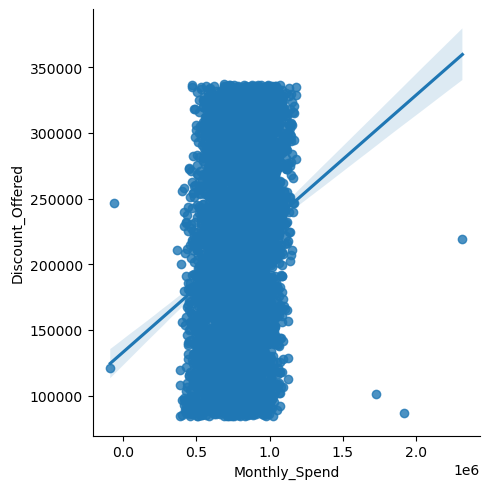

In [941]:
problem_5_corr_r, problem_5_pval_p = stats.pearsonr(df_clean['Discount_Offered'], df_clean['Monthly_Spend'])

print(f"[Discount_Offered - Monthly_Spend] Pearson\n r-correlation: {problem_5_corr_r:.4f},\n p-value: {problem_5_pval_p:.60f}")

sns.lmplot(data=df_clean,x='Monthly_Spend', y='Discount_Offered')

### **6. Apakah ada hubungan antara tiket bantuan yang diajukan dengan nilai kepuasan customer?**

Pertanyaan ini dapat dijawab dengan cara melakukan analisis korelasi. Karena tiket bantuan yang diajukan merupakan data numerik dengan distribusi normal dan nilai kepuasan customer merupakan data ordinal, maka analisis korelasi yang digunakan adalah menggunakan teknik **Kendall**.

Dari hasil kode berikut, analisis korelasi dengan teknik Kendall menghasilkan koefisien r-correlation `0.0108`. Nilai tersebut menunjukkan bahwa tidak ada korelasi antara tiket bantuan yang diajukan dengan nilai kepuasan customer, atau dari sudut pandang tertentu dianggap ada korelasi positif namun sangat lemah.

Karena nilainya yang positif dan sangat kecil mendekati nol, maka dapat disimpulkan bahwa:

> **Tiket bantuan yang diajukan tidak mempengaruhi nilai kepuasan customer dan tidak ada korelasi.**

[Support_Tickets_Raised - Satisfaction_Score] Kendall
 r-correlation: 0.0108,
 p-value: 0.343268


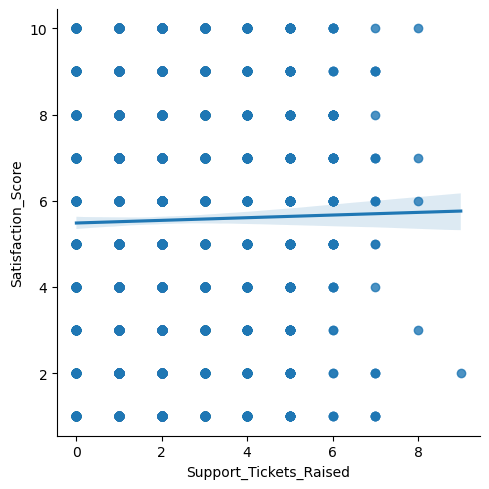

In [942]:
problem_6_dropna = df_clean.dropna(subset='Satisfaction_Score')

problem_6_corr_r, problem_6_pval_p = stats.kendalltau(problem_6_dropna['Support_Tickets_Raised'], problem_6_dropna['Satisfaction_Score'])

print(f"[Support_Tickets_Raised - Satisfaction_Score] Kendall\n r-correlation: {problem_6_corr_r:.4f},\n p-value: {problem_6_pval_p:.6f}")

sns.lmplot(data=df_clean,x='Support_Tickets_Raised', y='Satisfaction_Score')

### **7. Apakah tiket bantuan yang diajukan mempengaruhi berhentinya customer mengikuti streaming?**

Pertanyaan ini dapat dijawab dengan melakukan uji hipotesis/_Hypothesis Testing_. Data yang akan diuji adalah data tiket bantuan yang diajukan yang merupakan data numerik diskrit, dengan data status customer berhenti mengikuti streaming yang merupakan data kategorikal. Untuk itu jenis uji hipotesis yang digunakan adalah **Chi-Squared Test**.
  - `H0` _Hypothesis Null_ : Tidak ada hubungan antara tiket bantuan yang diajukan dengan berhentinya customer mengikuti streaming.
  - `H1` _Hypothesis Alternative_ : Ada hubungan antara tiket bantuan yang diajukan dengan berhentinya customer mengikuti streaming.

In [943]:
problem_7_contingency_table = pd.crosstab(df_clean['Support_Tickets_Raised'], df_clean['Churned'])

problem_7_contingency_table

Churned,False,True
Support_Tickets_Raised,,
0,378,250
1,765,575
2,811,592
3,536,354
4,270,191
5,0,180
6,0,67
7,0,26
8,0,4


Dari kode di bawah ini, dengan nilai `p-value` yang sangat kecil mendekati nol maka:
  1. `critical value` = `0.05`
  2. `p-value` = `2.6180 x 10^73` < `critical value`
  3. **`H0` _rejected_/ditolak**

Kesimpulannya adalah **Ada hubungan antara tiket bantuan yang diajukan dengan berhentinya customer mengikuti streaming**.

In [944]:
problem_7_chi = stats.chi2_contingency(problem_7_contingency_table)

print(f"[Churned - Support_Tickets_Raised] Chi-squared p-value: {problem_7_chi.pvalue}")

[Churned - Support_Tickets_Raised] Chi-squared p-value: 2.618018475098584e-73


### **8. Apakah metode pembayaran mempengaruhi pengeluaran langganan per bulan?**

Pertanyaan ini dapat dijawab dengan melakukan uji hipotesis/_Hypothesis Testing_. Data yang akan diuji adalah metode pembayaran yang merupakan data kategorikal `3` kategori, dengan data pengeluaran langganan per bulan yang merupakan data numerik. Untuk itu jenis uji hipotesis yang digunakan adalah **ANOVA Test**.
  - `H0` _Hypothesis Null_ : Tidak ada perbedaan signifikan rata-rata pengeluaran langganan per bulan untuk setiap metode pembayaran.
  - `H1` _Hypothesis Alternative_ : Ada setidaknya perbedaan signifikan rata-rata pengeluaran langganan per bulan pada salah satu metode pembayaran.

In [945]:
problem_8_groupby = df_clean.loc[:, ['Payment_Method', 'Monthly_Spend']].groupby(by='Payment_Method')

# Nilai Rata-rata
problem_8_mean = problem_8_groupby.mean()

# Print
problem_8_mean.apply(lambda c: c.apply(lambda x: f'Rp {x:,.0f}'.replace(',', '.')))

,Monthly_Spend
Payment_Method,
Credit Card,Rp 784.241
Debit Card,Rp 787.441
PayPal,Rp 784.638


Dari kode di bawah ini, dengan nilai `p-value` yang besar maka:
  1. `critical value` = `0.05`
  2. `p-value` = `0.8201384282535078` > `critical value`
  3. **`H0` _failed to reject_/gagal ditolak**

Kesimpulannya adalah **Tidak ada perbedaan signifikan rata-rata pengeluaran langganan per bulan untuk setiap metode pembayaran**.

In [946]:
problem_8_mean_list = [y['Monthly_Spend'] for x, y in problem_8_groupby]

problem_8_anova = stats.f_oneway(*problem_8_mean_list)
print('P-value:',problem_8_anova.pvalue)

P-value: 0.8201384152687364


### **9. Apakah penilaian kepuasan customer yang masih berlangganan sama dengan customer yang sudah tidak berlangganan?**

Pertanyaan ini dapat dijawab dengan melakukan uji hipotesis/_Hypothesis Testing_. Data yang akan diuji adalah data nilai kepuasan customer untuk customer yang masih mengikuti streaming dengan data nilai kepuasan customer yang tidak mengikuti streaming. Untuk itu jenis uji hipotesis yang digunakan adalah **Two-Sided Two-Sample Independent Test**.
  - `H0` _Hypothesis Null_ : Rata-rata nilai kepuasan customer untuk customer yang masih mengikuti streaming sama dengan customer yang tidak mengikuti streaming.
  - `H1` _Hypothesis Alternative_ : Rata-rata nilai kepuasan customer untuk customer yang masih mengikuti streaming tidak sama dengan customer yang tidak mengikuti streaming.

In [947]:
problem_9_not_churned = df_not_churned.loc[:, ['Satisfaction_Score']].dropna()
problem_9_churned = df_churned.loc[:, ['Satisfaction_Score']].dropna()

problem_9_crosstab = pd.crosstab(df_clean['Satisfaction_Score'], df_clean['Churned'])
problem_9_crosstab

Churned,False,True
Satisfaction_Score,,
1.0,0,450
2.0,0,439
3.0,0,407
4.0,360,109
5.0,333,103
6.0,367,110
7.0,365,98
8.0,328,121
9.0,351,92


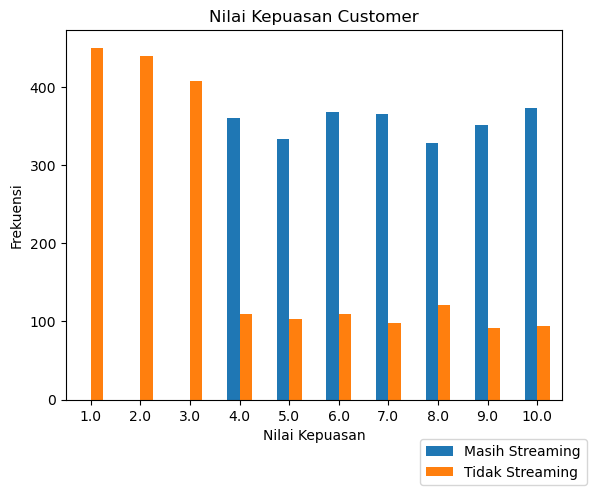

In [948]:
problem_9_plot1 = problem_9_crosstab.sort_index().plot.bar(
    rot=0,
    title='Nilai Kepuasan Customer',
)
problem_9_plot1.legend(['Masih Streaming', 'Tidak Streaming'], loc='lower left', bbox_to_anchor=(0.7, -0.25))
problem_9_plot1.set_xlabel('Nilai Kepuasan')
problem_9_plot1.set_ylabel('Frekuensi')
plt.savefig(f'{plot_dir}/plot_10_problem_9.jpg', bbox_inches='tight')
plt.show()

In [949]:
print(f'Rata-rata Nilai Kepuasan Masih Streaming : {problem_9_not_churned['Satisfaction_Score'].mean():.2f}')
print(f'Rata-rata Nilai Kepuasan Tidak Streaming : {problem_9_churned['Satisfaction_Score'].mean():.2f}')

Rata-rata Nilai Kepuasan Masih Streaming : 7.01
Rata-rata Nilai Kepuasan Tidak Streaming : 3.75


Dari kode di bawah ini, dengan nilai `p-value` sama dengan nol maka:
  1. `critical value` = `0.05`
  2. `p-value` = `0.0` < `critical value`
  3. **`H0` _rejected_/ditolak**

Kesimpulannya adalah **Rata-rata nilai kepuasan customer untuk customer yang masih mengikuti streaming tidak sama dengan customer yang tidak mengikuti streaming**.

In [950]:
problem_9_t_stat, problem_9_p_val = stats.ttest_ind(problem_9_not_churned['Satisfaction_Score'],problem_9_churned['Satisfaction_Score'])
print('T-Statistic:',problem_9_t_stat)
print('P-value:',problem_9_p_val)

T-Statistic: 46.093146582773485
P-value: 0.0


## **D. Dashboard Tableau**

Hasil analisis bisa diakses pada [Tableau Public berikut](https://public.tableau.com/app/profile/elang.cergas.pembrani/viz/FTDS_P0M1/Dashboard?publish=yes).

Terdapat 2 halaman visualisasi data yang bisa diakses dengan menekan tombol `Visualisasi Data`, dan juga terdapat 9 halaman Penjabaran Masalah yang bisa diakses dengan menekan masing-masing tombol `Go >`.

### Tampilan Tableau - Dashboard
![tableau_dashboard](./tableau/tableau_dashboard.png)


<!-- 
### Tampilan Tableau - Visualisasi Data 1
![tableau_vis1](tableau/tableau_vis1.png)

### Tampilan Tableau - Visualisasi Data 2
![tableau_vis2](tableau/tableau_vis2.png)

### Tampilan Tableau - Penjabaran Masalah #1
![tableau_problem1](tableau/tableau_problem1.png)

### Tampilan Tableau - Penjabaran Masalah #2
![tableau_problem2](tableau/tableau_problem2.png)

### Tampilan Tableau - Penjabaran Masalah #3
![tableau_problem3](tableau/tableau_problem3.png)

### Tampilan Tableau - Penjabaran Masalah #4
![tableau_problem4](tableau/tableau_problem4.png)

### Tampilan Tableau - Penjabaran Masalah #5
![tableau_problem5](tableau/tableau_problem5.png)

### Tampilan Tableau - Penjabaran Masalah #6
![tableau_problem6](tableau/tableau_problem6.png)

### Tampilan Tableau - Penjabaran Masalah #7
![tableau_problem7](tableau/tableau_problem7.png)

### Tampilan Tableau - Penjabaran Masalah #8
![tableau_problem8](tableau/tableau_problem8.png)

### Tampilan Tableau - Penjabaran Masalah #9
![tableau_problem9](tableau/tableau_problem9.png)
-->


---

# **VI. Conclusion**

Dashboard bisa diakses pada link [Tableau Public berikut](https://public.tableau.com/app/profile/elang.cergas.pembrani/viz/FTDS_P0M1/Dashboard?publish=yes).

## **Rangkuman Hasil Analisis Penjabaran Masalah**

Berikut adalah rangkuman atas penjabaran masalah yang sudah dianalisis:
  1. **Demografi customer seperti apa jika dilihat dari kelompok usia dan jenis kelamin?**
     
     ![demografi-customer-seperti-apa-jika-dilihat-dari-kelompok-usia-dan-jenis-kelamin](plot/df_problem_1.png)
     
     ![demografi-customer-seperti-apa-jika-dilihat-dari-kelompok-usia-dan-jenis-kelamin](plot/plot_6_problem_1.jpg)
  
  <br />

  2. **Demografi customer seperti apa yang paling sering menonton streaming?**
     
     > **Demografi yang paling sering menonton streaming adalah `Laki-laki` dengan kelompok usia `15-24` tahun.**

     <!--
     ![demografi-customer-seperti-apa-yang-paling-sering-menonton-streaming](plot/df_problem_2.png)
     ![demografi-customer-seperti-apa-yang-paling-sering-menonton-streaming](plot/plot_7_problem_2.jpg)
     -->

  <br />
  <br />

  3. **Berapa rata-rata jangka waktu customer telah melakukan _subscribe_ berdasarkan demografi?**
     
     ![berapa-rata-rata-jangka-waktu-customer-telah-melakukan-subscribe-berdasarkan-demografi](plot/df_problem_3.png)

     ![berapa-rata-rata-jangka-waktu-customer-telah-melakukan-subscribe-berdasarkan-demografi](plot/plot_8_problem_3.jpg)

  <br />

  4. **Berapa rata-rata pengeluaran _subscription_ per bulan customer berdasarkan demografi?**
     
     ![berapa-rata-rata-pengeluaran-subscription-per-bulan-customer-berdasarkan-demografi](plot/df_problem_4.png)

     ![berapa-rata-rata-pengeluaran-subscription-per-bulan-customer-berdasarkan-demografi](plot/plot_9_problem_4.jpg)

  <br />

  5. **Bagaimana diskon yang ditawarkan mempengaruhi pengeluaran langganan per bulan?**
     
     > **Diskon yang ditawarkan memiliki korelasi positif yang kecil dan hanya sedikit mempengaruhi pengeluaran langganan per bulan.**
     >
     > **Semakin besar diskon yang ditawarkan, maka semakin besar pula pengeluaran langganan per bulan.**

  <br />

  6. **Apakah ada hubungan antara tiket bantuan yang diajukan dengan nilai kepuasan customer?**
     
     > **Tiket bantuan yang diajukan tidak mempengaruhi nilai kepuasan customer dan tidak ada korelasi.**

  <br />

  7. **Apakah tiket bantuan yang diajukan mempengaruhi berhentinya customer mengikuti streaming?**
     
     > **Ada hubungan antara tiket bantuan yang diajukan dengan berhentinya customer mengikuti streaming**

  <br />

  8. **Apakah metode pembayaran mempengaruhi pengeluaran langganan per bulan?**
     
     > **Tidak ada perbedaan signifikan rata-rata pengeluaran langganan per bulan untuk setiap metode pembayaran.**

  <br />

  9. **Apakah penilaian kepuasan customer yang masih berlangganan sama dengan customer yang sudah tidak berlangganan?**
     
     > **Rata-rata nilai kepuasan customer untuk customer yang masih mengikuti streaming tidak sama dengan customer yang tidak mengikuti streaming.**
     >
     > **Rata-rata Masih streaming `7.01` - Tidak streaming `3.75`**


## **Kesimpulan Akhir**

Jika dilihat dari _problem statement_ di awal yaitu:
> Menganalisis demografi, perilaku dan _engagement_ customer streaming dalam kurun waktu 1 minggu dengan cara menganalisis dataset Streaming Service 1 tahun terakhir, sehingga dapat menentukan strategi yang tepat untuk mempertahankan customer streaming

Dengan tujuan **Menentukan strategi untuk mempertahankan customer streaming**, maka kesimpulan yang dapat diambil setelah mendapatkan hasil analisis tersebut adalah:
  1. Demografi customer yang paling sering menonton streaming adalah `Laki-laki` dengan kelompok usia muda `15-24`. Oleh karena itu, salah satu strategi yang bisa diterapkan untuk mempertahankan customer streaming yaitu memfokuskan target pemasaran ke demografi tersebut kemudian menyesuaikan strategi pemasaran dan promosi yang sesuai dan efektif.
  2. Diskon yang ditawarkan memiliki korelasi positif yang kecil dengan pengeluaran customer streaming. Dapat disimpulkan bahwa peningkatan tawaran diskon belum perlu dilakukan karena korelasinya tidak signifikan dan ada potensi kerugian finansial.
  3. Melihat bahwa ada hubungan antara jumlah tiket bantuan yang diajukan dengan berhentinya customer streaming, dapat diasumsikan bahwa harus ada usaha untuk mengurangi jumlah tiket bantuan, misalnya dengan memperbaiki kualitas layanan sehingga customer lebih jarang komplain lewat tiket bantuan. Atau juga dengan meningkatkan responsivitas terhadap tiket bantuan.
  4. Metode pembayaran yang ditawarkan tidak mempengaruhi rata-rata pengeluaran customer, oleh karena itu bisa disimpulkan bahwa tidak perlu adanya strategi baru terkait dengan metode pembayaran.
  5. Rata-rata nilai kepuasan untuk customer yang masih streaming berbeda dengan yang sudah berhenti streaming. Dari nilai rata-ratanya sendiri juga terlihat ada ketimpangan yang cukup tinggi (`7.01` vs `3.75`). Ini menunjukkan bahwa salah satu faktor utama yang menyebabkan customer berhenti streaming adalah ketidakpuasan terhadap layanan. Oleh karena itu diperlukan strategi baru untuk membuat customer menjadi lebih puas dengan layanan streaming kita. Strategi-strategi baru ini perlu dilakukan analisis lebih lanjut.


Hasil analisis bisa dilihat pada [Tableau Public berikut](https://public.tableau.com/app/profile/elang.cergas.pembrani/viz/FTDS_P0M1/Dashboard?publish=yes).